<a href="https://colab.research.google.com/github/andrejuniorba/Projetos_Machine_Learning/blob/main/Modelo_de_Classifica%C3%A7%C3%A3o_Floresta_Aleat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Floresta aleatória (random forest)**

## Floresta aleatória (random forest) é um algoritmo de aprendizado de máquina supervisionado. É um dos algoritmos mais utilizados devido à sua precisão, simplicidade e flexibilidade. O fato de poder ser usado para tarefas de classificação e regressão, combinado com sua natureza não linear, torna-o altamente adaptável a uma variedade de dados e situações. 

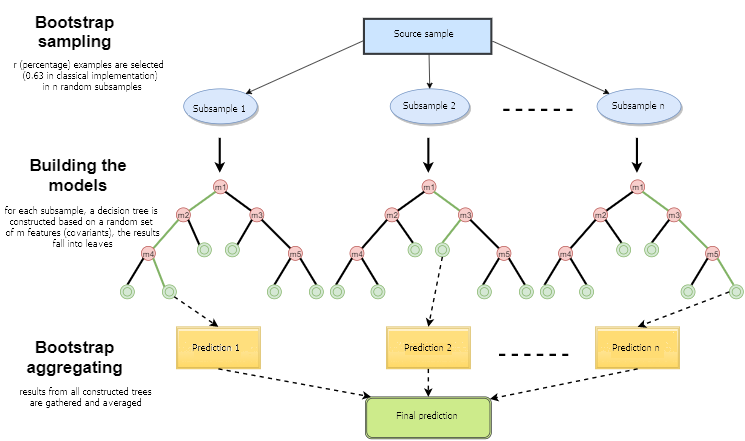

## 0.Case

Com base nos dados antigos precisamos prever quantos e quais dos novos clientes:

* Não vão acionar a seguradora;

* Vão acionar por conta de algum serviço;

* Vão acionar por conta de furto.

___

In [54]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#Biblioteca/Função para ignorar alertas da IDE
from warnings import filterwarnings

## 1.Base de dados

Plan 1 = Base para treino

Plan 2 = Base para previsões

In [55]:
base_dados = pd.read_excel('/content/drive/MyDrive/Dados - Data Science/BaseDados_FlorestaDeDecisão.xlsx', 'Plan1')

In [56]:
'''
Serviço = 1 (Não usou serviços)
Serviço = 2 (Usou algum serviço da seguradora)
Serviço = 3 (Furto)
'''
base_dados.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [57]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [58]:
'''
Verificação de algumas estatísticas 
'''
base_dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


## 2.Análise exploratória

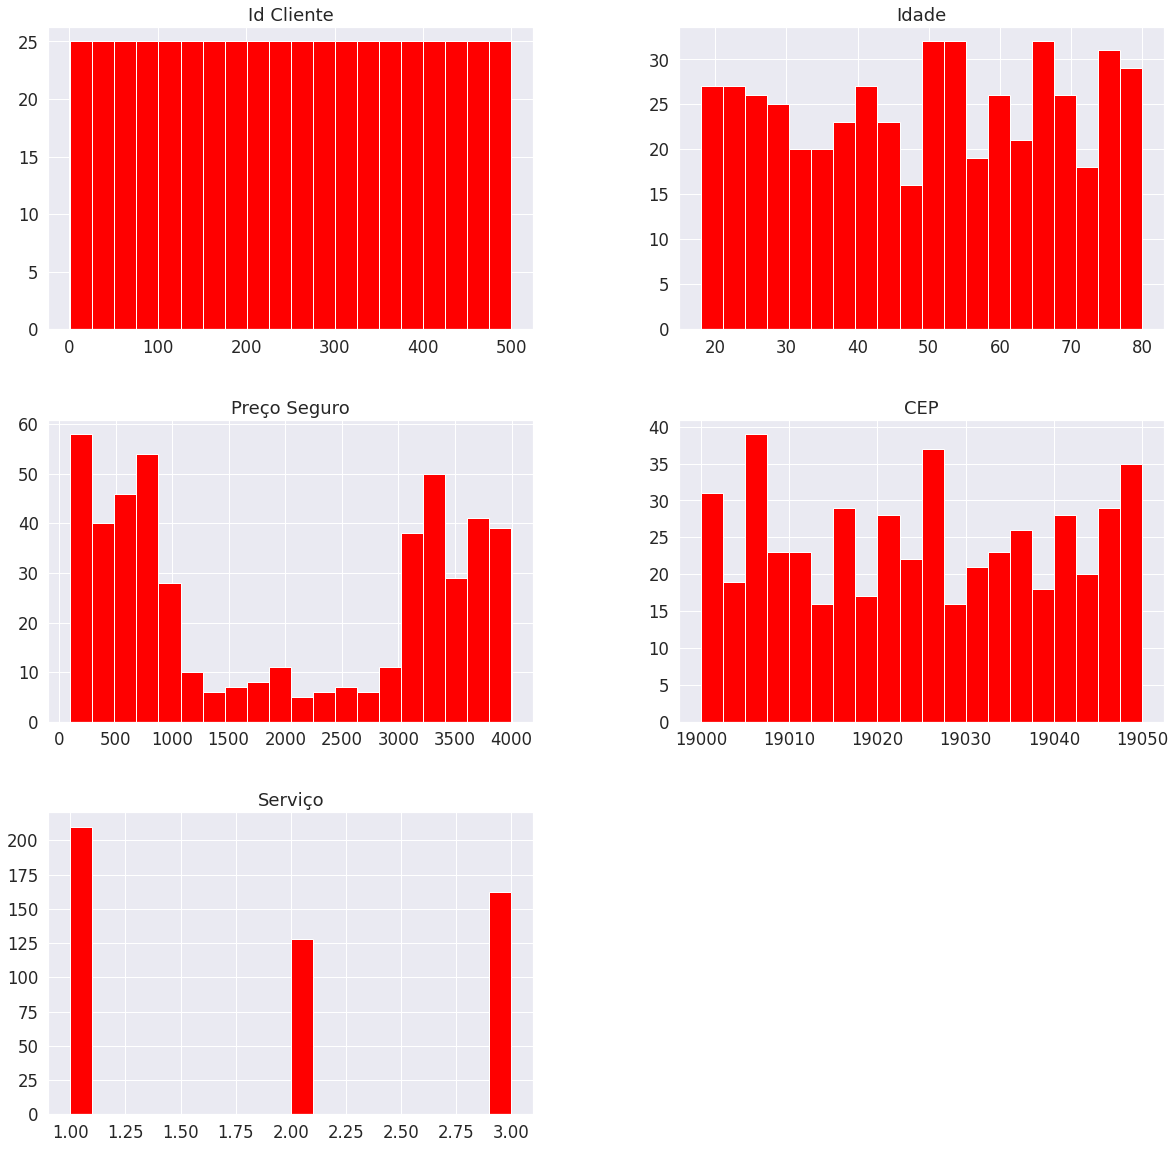

In [59]:
sns.set(font_scale=1.5, rc={'figure.figsize': (20,20)})
eixo = base_dados.hist(bins=20, color = 'red')

**Procurando padrões**

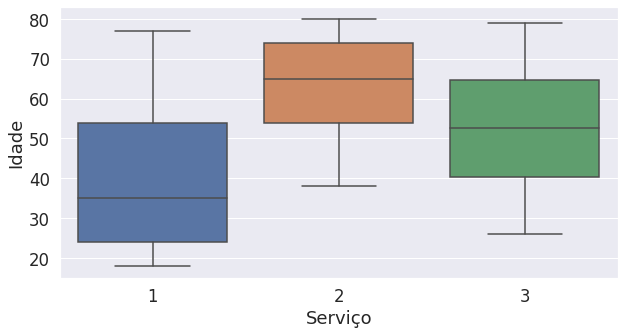

In [60]:
'''
Pessoas com menos idade tendem a não usar serviços, enquanto a com maior idade tende a usar mais.
Em relação ao furto é equilibrado.
'''
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x= 'Serviço', y='Idade');

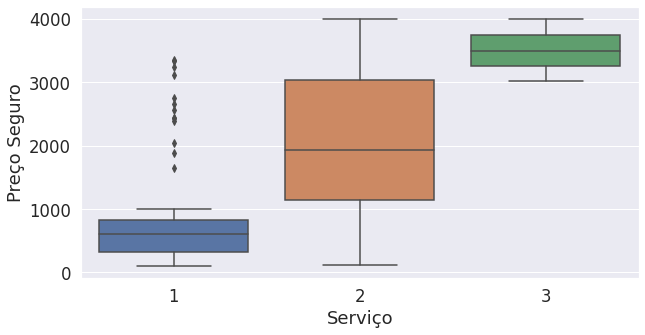

In [61]:
# Pessoas que normalmente são furtadas tendem a pagar mais caro pelo seguro

plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x= 'Serviço', y='Preço Seguro');

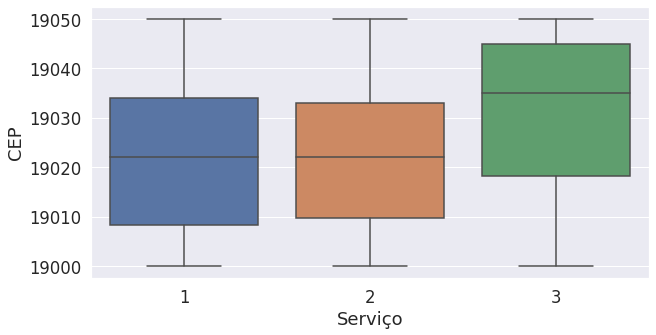

In [62]:
'''
Em relação a furto, existe uma concentração entre os ceps 19030 a 19045 aproximadamente
'''
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x= 'Serviço', y='CEP');

## 3.Divisão de dados treino e teste

In [63]:
base_dados.head(3)

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3


In [64]:
#Todas as linhas da coluna 1 a 4.
#Variáveis de características
caracteristicas = base_dados.iloc[:,1:4].values

#Variável de previsão
previsor = base_dados.iloc[:,4:5].values

In [65]:
caracteristicas

array([[   69,  3930, 19005],
       [   27,  3336, 19027],
       [   49,  3936, 19001],
       ...,
       [   58,  1520, 19019],
       [   72,  3155, 19029],
       [   54,  3656, 19034]])

In [66]:
previsor

array([[3],
       [1],
       [3],
       [1],
       [2],
       [3],
       [1],
       [3],
       [1],
       [1],
       [2],
       [3],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [1],
       [1],
       [2],
       [1],
       [3],
       [3],
       [1],
       [2],
       [1],
       [3],
       [3],
       [3],
       [3],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [3],
       [3],
       [1],
       [1],
       [2],
       [3],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3],
       [1],
       [1],
       [3],
       [3],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
    

**Dividir os dados**

In [67]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
'''
Dividir o conjunto de dados:
Uma fatia das características (x) em treinamento e outra em teste.
Da mesma forma para nosso previsor (y)
'''
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    caracteristicas,
    previsor,
    #dividir 70% dos dados para treinamento e 30% para teste
    test_size = 0.30,
    random_state=10
)

print(len(base_dados))
print(len(x_treinamento))
print(len(x_teste))

500
350
150


## 4.Modelo

In [68]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators é o número de árvores que o modelo vai verificar para classificar
algoritmo_floresta_aleatoria = RandomForestClassifier(n_estimators=500)

In [69]:
#Treinar modelo
algoritmo_floresta_aleatoria.fit(x_treinamento, y_treinamento)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=500)

## 5.Analisando Matriz de Confusão

In [70]:
previsoes = algoritmo_floresta_aleatoria.predict(x_teste)
#Matriz de confusão
from sklearn.metrics import confusion_matrix

[[60  3  1]
 [ 6 22  8]
 [ 1  1 48]]


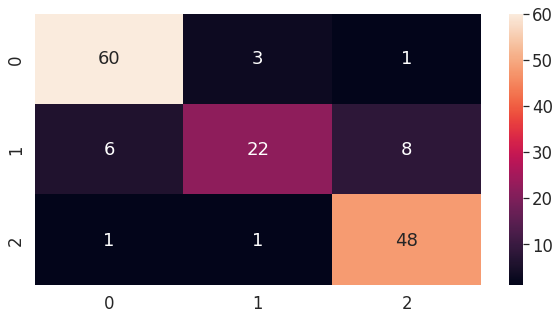

In [71]:
matriz_confusao = confusion_matrix (y_teste, previsoes)
print(matriz_confusao)

plt.figure(figsize=(10,5))
sns.heatmap(matriz_confusao, annot=True)

## 6.Avaliar acurácia do modelo

In [72]:
from sklearn.metrics import classification_report

percentuais = classification_report(y_teste, previsoes)

In [73]:
#Recall é o percentual de acerto do modelo por linha (%)
#Precision é a precisão do modelo (%)
print(percentuais)

              precision    recall  f1-score   support

           1       0.90      0.94      0.92        64
           2       0.85      0.61      0.71        36
           3       0.84      0.96      0.90        50

    accuracy                           0.87       150
   macro avg       0.86      0.84      0.84       150
weighted avg       0.87      0.87      0.86       150



## 7.Previsões Futuras

In [74]:
nova_base = pd.read_excel('/content/drive/MyDrive/Dados - Data Science/BaseDados_FlorestaDeDecisão.xlsx', 'Plan2')

In [75]:
nova_base.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [76]:
prever = nova_base.iloc[:,1:4].values

In [77]:
#Criar uma nova coluna com as previsões do modelo
nova_base['Previsão do Modelo'] = algoritmo_floresta_aleatoria.predict(prever)

In [79]:
nova_base.head(10)

,Id Cliente,Idade,Preço Seguro,CEP,Previsão do Modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
5,1006,36,823,19025,1
6,1007,44,3895,19032,3
7,1008,36,457,19023,1
8,1009,40,427,19008,1
9,1010,40,928,19009,1


In [80]:
nova_base['Previsão do Modelo'].value_counts()

1    15
2     5
3     1
Name: Previsão do Modelo, dtype: int64

Com 87% de assertividade o modelo preveu que:

15 dos novos clientes não irão acionar a seguradora.

5 clientes vão acionar a seguradora para solicitar algum tipo de serviço.

1 cliente vai acionar a seguradora por conta de furto.